In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline

In [2]:
df = pd.read_csv('vehicles.csv')
print(df.shape, df.columns)

(426880, 26) Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


In [3]:
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)


Missing values per column:
 id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [4]:
df = df[df['year'] >= 2015]
df = df[(df['price'] >= 500) & (df['price'] <= 100000)]
df = df[(df['odometer'] >= 0) & (df['odometer'] <= 500000)]

In [5]:
cols_to_drop = [
    'url', 'region_url', 'image_url', 'description', 'posting_date',
     'VIN', 'lat', 'long', 'county', 'size'
]

existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
df.drop(columns=existing_cols_to_drop, inplace=True)


In [6]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state'],
      dtype='object')

In [7]:
categorical_cols = ['manufacturer','model','condition','cylinders','fuel',
                    'title_status','transmission','drive','type','paint_color','state']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

In [8]:
# Convert year, price, odometer to integer type
df['year'] = df['year'].astype(int)
df['price'] = df['price'].astype(int)
df['odometer'] = df['odometer'].astype(int)


In [9]:
from datetime import datetime
current_year = datetime.now().year
df['car_age'] = current_year - df['year']


In [10]:
# Compute price per mile 
df['price_per_mile'] = df['price'] / df['odometer']


In [11]:
if 'region' in df.columns and 'state' not in df.columns:
    df['state'] = df['region'].str.split(',', expand=True).iloc[:, -1].str.strip()


In [12]:
df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,car_age,price_per_mile
426875,7301591192,wyoming,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226,clean,other,fwd,sedan,Unknown,wy,6,0.732018
426876,7301591187,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,good,Unknown,gas,12029,clean,other,fwd,sedan,red,wy,5,2.543021
426877,7301591147,wyoming,34990,2020,cadillac,xt4 sport suv 4d,good,Unknown,diesel,4174,clean,other,Unknown,hatchback,white,wy,5,8.382846
426878,7301591140,wyoming,28990,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112,clean,other,fwd,sedan,silver,wy,7,0.962739
426879,7301591129,wyoming,30590,2019,bmw,4 series 430i gran coupe,good,Unknown,gas,22716,clean,other,rwd,coupe,Unknown,wy,6,1.346628


In [13]:
df.to_csv('cleaned_vehicles1.csv', index=False)

In [14]:
# print(df.info())
# print(df.describe())
# df['state'].value_counts().head(10)

## 🔢 Price Distribution

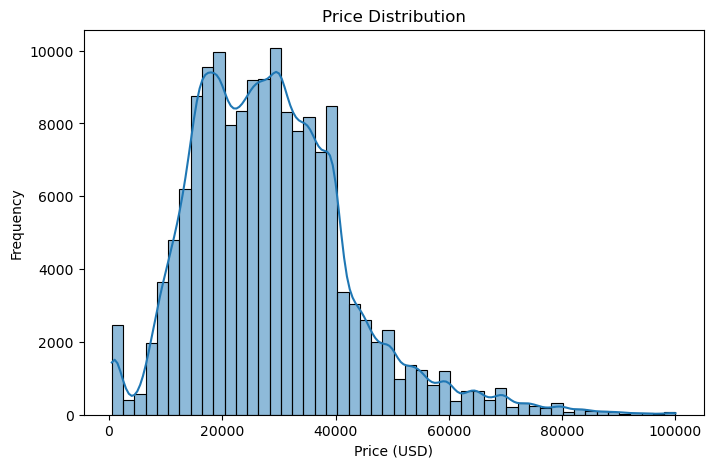

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde= True)
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

## 🚗 Odometer (Mileage) Analysis

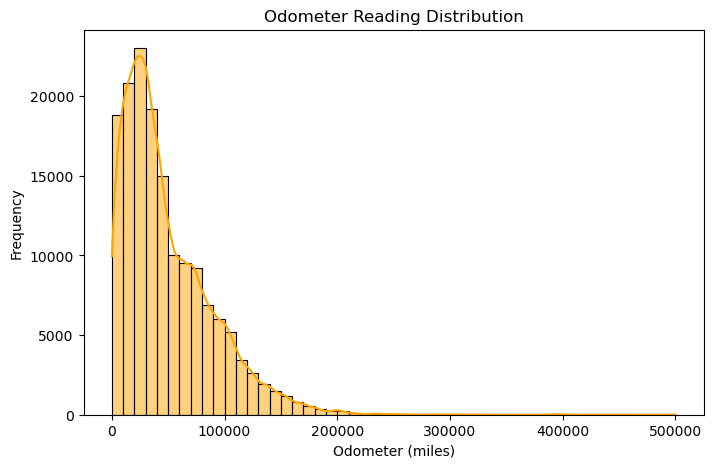

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['odometer'], bins=50, kde=True, color='orange')
plt.title('Odometer Reading Distribution')
plt.xlabel('Odometer (miles)')
plt.ylabel('Frequency')
plt.show()

## 🏷️ Price by Manufacturer (Top 10)

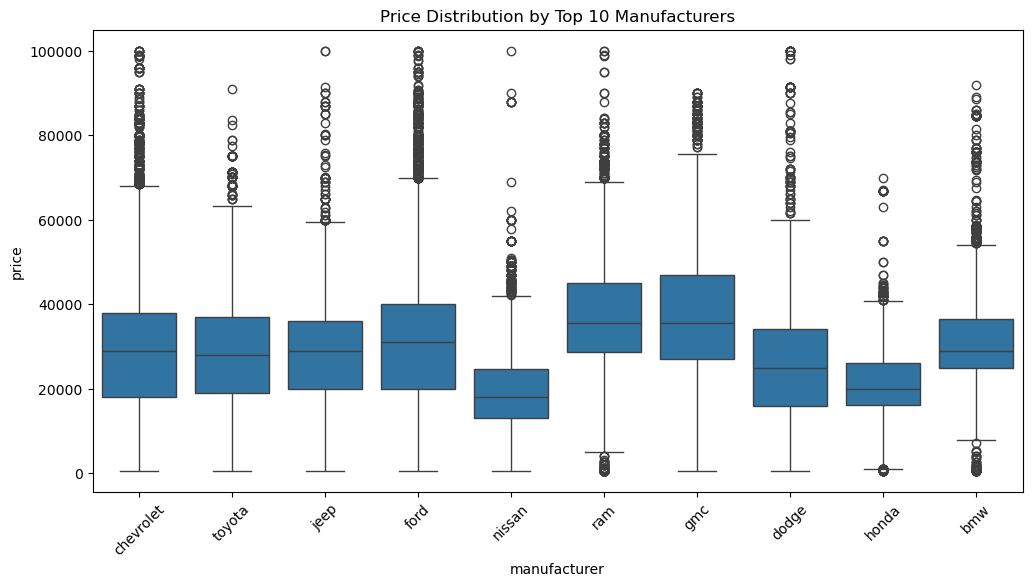

In [17]:
top_brands = df['manufacturer'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=df[df['manufacturer'].isin(top_brands)])
plt.title('Price Distribution by Top 10 Manufacturers')
plt.xticks(rotation=45)
plt.show()

## 🛠️ Price by Vehicle Condition

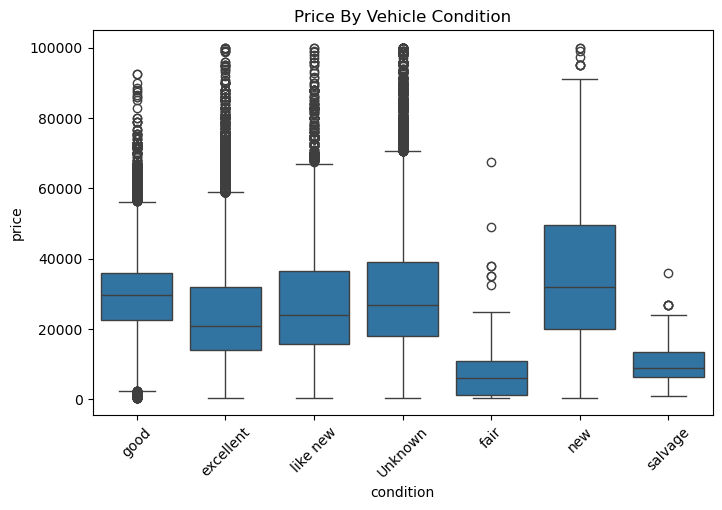

In [18]:
plt.figure(figsize = (8,5))
sns.boxplot(x = 'condition', y = 'price', data = df)
plt.title('Price By Vehicle Condition')
plt.xticks(rotation = 45)
plt.show()

## 🔗 Feature Correlations

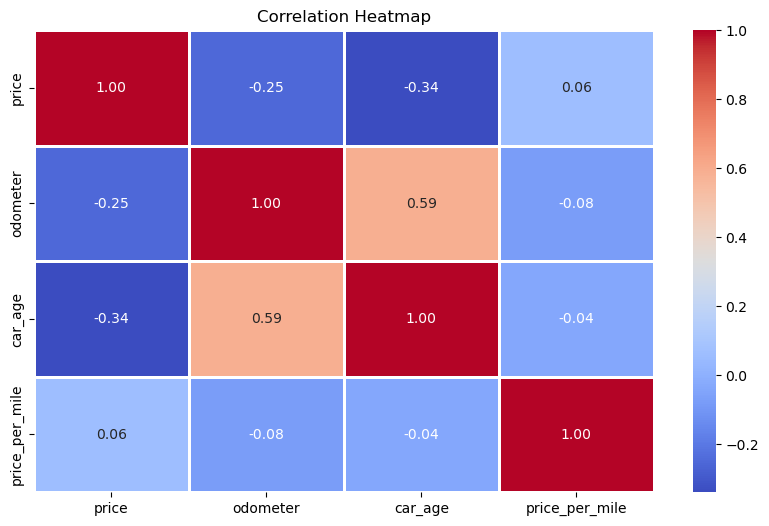

In [19]:
plt.figure(figsize = (10,6))
sns.heatmap(df[['price', 'odometer', 'car_age', 'price_per_mile']].corr(), 
            annot = True, cmap = 'coolwarm', linewidth = 1, fmt= '.2f')
plt.title("Correlation Heatmap")
plt.show()

## 🛢️ Grouped Insights

#####  Average Price by Fuel Type

In [20]:
df.groupby('fuel')['price'].mean().sort_values(ascending = False)

fuel
diesel      49007.734343
other       31580.659940
electric    29211.127479
gas         26792.108023
Unknown     24775.709058
hybrid      23614.611927
Name: price, dtype: float64

#####  Average Price by Transmission Type

In [21]:
df['state'].value_counts().head(10)

state
ca    16910
fl    10792
tx    10340
ny     7085
wa     6012
oh     5879
mi     5782
nc     5241
tn     5171
or     4629
Name: count, dtype: int64

#####  Count of Listings by State (Top 10)

In [22]:
df.groupby('transmission')['price'].mean().sort_values(ascending=False)

transmission
other        29861.485067
Unknown      29574.247261
automatic    28240.680685
manual       26418.667964
Name: price, dtype: float64

## Pairplot of Key Predictors

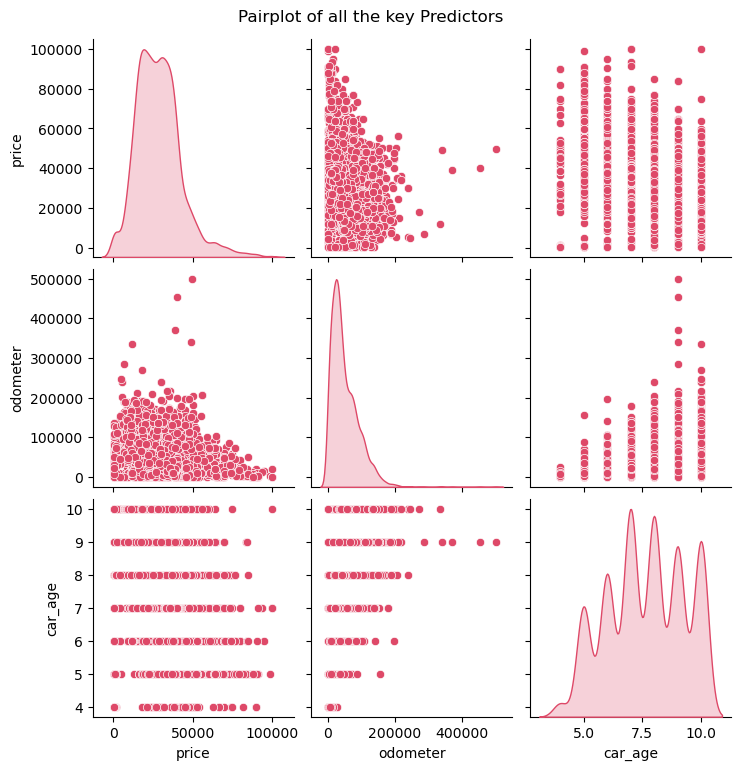

In [23]:
sample_df = df.sample(5000, random_state=42)
magma_color = cm.magma(0.6)
sns.pairplot(
    sample_df[['price', 'odometer', 'car_age']],
    diag_kind='kde',
    plot_kws={'color': magma_color},
    diag_kws={'color': magma_color}
)
plt.suptitle('Pairplot of all the key Predictors', y=1.02)
plt.show()

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the cleaned data
df = pd.read_csv('cleaned_vehicles1.csv')

# Drop unnecessary columns
df = df.drop(['id', 'region', 'model', 'description', 'image_url'], axis=1, errors='ignore')

# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = ['manufacturer', 'condition', 'cylinders', 'fuel', 
                    'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
numerical_cols = ['year', 'odometer', 'car_age', 'price_per_mile']

# Preprocessing pipeline
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Display the shapes
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (125431, 14)
Test set shape: (31358, 14)


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the cleaned data
df = pd.read_csv('cleaned_vehicles1.csv')

# Drop unnecessary columns
df = df.drop(['id', 'region', 'model', 'description', 'image_url'], axis=1, errors='ignore')

# Handle infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values (choose one approach)
# Option 1: Drop rows with missing values
df.dropna(inplace=True)

# Option 2: Fill missing values
# numerical_cols = ['year', 'odometer', 'car_age', 'price_per_mile']
# categorical_cols = ['manufacturer', 'condition', 'cylinders', 'fuel', 
#                    'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
# df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
# for col in categorical_cols:
#     df[col] = df[col].fillna(df[col].mode()[0])

# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = ['manufacturer', 'condition', 'cylinders', 'fuel', 
                    'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
numerical_cols = ['year', 'odometer', 'car_age', 'price_per_mile']

# Preprocessing pipeline
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Create pipeline with preprocessing and model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model_pipeline.predict(X_train)
    y_test_pred = model_pipeline.predict(X_test)
    
    # Calculate metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Display results
    print(f"Training MAE: {train_mae:.2f}")
    print(f"Test MAE: {test_mae:.2f}")
    print(f"Training RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Training R2: {train_r2:.2f}")
    print(f"Test R2: {test_r2:.2f}")
    
    return model_pipeline, {
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2
    }

# Linear Regression
print("Linear Regression Results:")
lr_model, lr_metrics = evaluate_model(LinearRegression(), X_train, X_test, y_train, y_test)

Linear Regression Results:
Training MAE: 6053.11
Test MAE: 5998.79
Training RMSE: 8944.02
Test RMSE: 8873.47
Training R2: 0.60
Test R2: 0.59


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Reduce n_estimators for faster testing (increase later for better performance)
rf_model = RandomForestRegressor(n_estimators=50,  # Reduced from 100 for faster execution
                                max_depth=10,     # Limit tree depth
                                random_state=42,
                                n_jobs=-1)        # Use all CPU cores

print("\nRandom Forest Results:")
rf_model, rf_metrics = evaluate_model(rf_model, X_train, X_test, y_train, y_test)


Random Forest Results:
Training MAE: 1631.31
Test MAE: 1669.80
Training RMSE: 3827.67
Test RMSE: 4016.40
Training R2: 0.93
Test R2: 0.92


In [27]:
!pip install xgboost

In [28]:
from xgboost import XGBRegressor

# Optimized XGBoost
print("\nXGBoost Results:")
xgb_model = XGBRegressor(
    n_estimators=150,           # Increased from 100 for better performance
    max_depth=6,                # Optimal depth for regression
    learning_rate=0.1,          # Default good starting point
    subsample=0.8,              # Prevents overfitting
    colsample_bytree=0.8,       # Uses 80% of features per tree
    reg_alpha=0.1,              # L1 regularization
    reg_lambda=1,               # L2 regularization
    random_state=42,
    n_jobs=-1,                  # Use all CPU cores
    early_stopping_rounds=10,   # Stop if no improvement
    eval_metric='mae',          # Use MAE for evaluation
    tree_method='hist'          # Faster histogram-based method
)

# Need to preprocess data first for early stopping
preprocessor.fit(X_train)
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Fit with early stopping
xgb_model.fit(
    X_train_preprocessed, 
    y_train,
    eval_set=[(X_test_preprocessed, y_test)],
    verbose=1  # Shows training progress
)

# Get predictions
y_train_pred = xgb_model.predict(X_train_preprocessed)
y_test_pred = xgb_model.predict(X_test_preprocessed)

# Calculate metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Store metrics
xgb_metrics = {
    'train_mae': train_mae,
    'test_mae': test_mae,
    'train_rmse': train_rmse,
    'test_rmse': test_rmse,
    'train_r2': train_r2,
    'test_r2': test_r2
}

print(f"Training MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Training R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")


XGBoost Results:
[0]	validation_0-mae:10091.67683
[1]	validation_0-mae:9344.63078
[2]	validation_0-mae:8662.75048
[3]	validation_0-mae:8130.56266
[4]	validation_0-mae:7665.14898
[5]	validation_0-mae:7150.24553
[6]	validation_0-mae:6708.83873
[7]	validation_0-mae:6313.00517
[8]	validation_0-mae:5903.02831
[9]	validation_0-mae:5695.21262
[10]	validation_0-mae:5334.81716
[11]	validation_0-mae:4959.25452
[12]	validation_0-mae:4632.40053
[13]	validation_0-mae:4345.67301
[14]	validation_0-mae:4070.16144
[15]	validation_0-mae:3822.58854
[16]	validation_0-mae:3708.39070
[17]	validation_0-mae:3503.10384
[18]	validation_0-mae:3310.39633
[19]	validation_0-mae:3135.12176
[20]	validation_0-mae:2976.62195
[21]	validation_0-mae:2838.21094
[22]	validation_0-mae:2778.09543
[23]	validation_0-mae:2746.46741
[24]	validation_0-mae:2622.45270
[25]	validation_0-mae:2518.31487
[26]	validation_0-mae:2455.00211
[27]	validation_0-mae:2367.75593
[28]	validation_0-mae:2294.58657
[29]	validation_0-mae:2274.46695
[

In [29]:
# Create a comparison DataFrame
metrics_df = pd.DataFrame({
    'Linear Regression': lr_metrics,
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics
}).T

# Display the comparison
print("\nModel Comparison:")
metrics_df


Model Comparison:


,train_mae,test_mae,train_rmse,test_rmse,train_r2,test_r2
Linear Regression,6053.106108,5998.788501,8944.021323,8873.471299,0.597951,0.593762
Random Forest,1631.310742,1669.795712,3827.669643,4016.404788,0.926365,0.916772
XGBoost,807.436830,842.018238,1430.961346,1694.447574,0.989709,0.985187


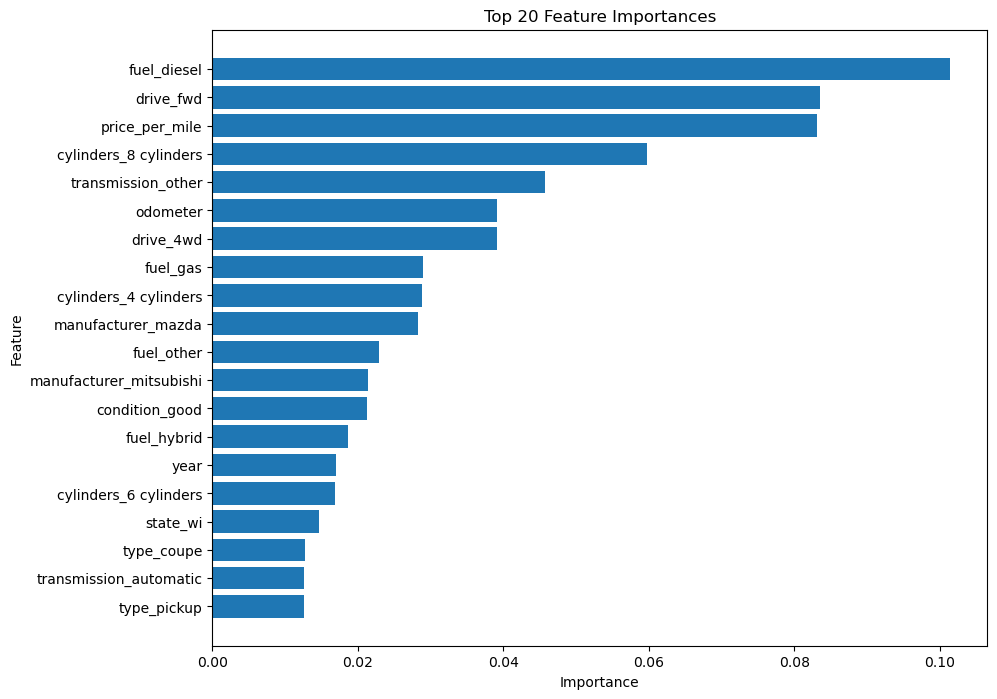

In [30]:
import matplotlib.pyplot as plt

# Get feature names after one-hot encoding
preprocessor.fit(X_train)
feature_names = (numerical_cols + 
                 list(preprocessor.named_transformers_['cat']
                     .get_feature_names_out(categorical_cols)))

# Get feature importances from the model
importances = xgb_model.feature_importances_  # Changed this line

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'][:20], feature_importance['importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [3, 6, 9],
    'model__learning_rate': [0.01, 0.1, 0.2]
}

# Create pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])

# Grid search
grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=3, 
                          scoring='neg_mean_absolute_error',
                          n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate best model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print("\nTuned XGBoost Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R2: {r2_score(y_test, y_pred):.2f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'model__learning_rate': 0.2, 'model__max_depth': 9, 'model__n_estimators': 150}

Tuned XGBoost Performance:
MAE: 381.62
RMSE: 1281.21
R2: 0.99



Sample Predictions:
        Actual     Predicted  Difference  Pct_Difference
66860    15590  15503.492188   86.507812        0.554893
48408      622    685.874512  -63.874512      -10.269214
143227   23990  24107.107422 -117.107422       -0.488151
136027   43990  43726.117188  263.882812        0.599870
68041    21590  21830.000000 -240.000000       -1.111626
114093   10900  10990.992188  -90.992188       -0.834791
42040     1000    837.410217  162.589783       16.258978
1349     29890  29968.208984  -78.208984       -0.261656
112744   36572  36438.843750  133.156250        0.364093
68764    29990  29970.148438   19.851562        0.066194


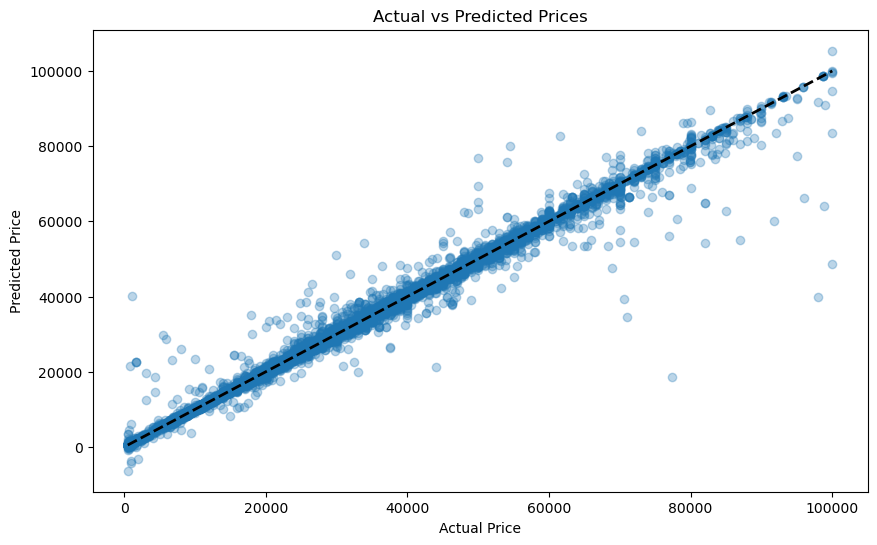

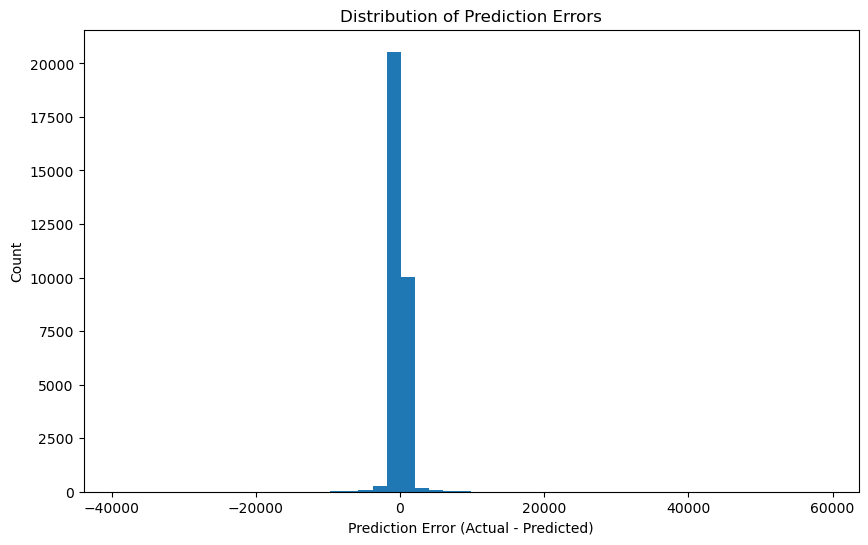

In [32]:
# Make predictions with the best model
final_predictions = best_xgb.predict(X_test)

# Create a DataFrame comparing actual vs predicted prices
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': final_predictions,
    'Difference': y_test - final_predictions
})

# Calculate percentage difference
results['Pct_Difference'] = (results['Difference'] / results['Actual']) * 100

# Display some results
print("\nSample Predictions:")
print(results.sample(10))

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_predictions, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

# Plot distribution of errors
plt.figure(figsize=(10, 6))
plt.hist(results['Difference'], bins=50)
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.show()

In [33]:
import joblib

# Save the model
joblib.dump(best_xgb, 'car_price_predictor.pkl')

# To load the model later:
# loaded_model = joblib.load('car_price_predictor.pkl')

['car_price_predictor.pkl']